참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengage Learning, 2013.



`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)<br>
Bring in `module`'s that would expand features of `python`. (This file may use just some of them.)



In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비



## 예제 04.002



### 문제에서 주어진 변수<br>Given Parameters



각 구간 길이<br>Length of each section



In [2]:
L_AB_m = 0.75 * 2
L_BC_m = 0.25 * 2



하중



In [3]:
M_B_Nm = 3.0



### A, B, C, D 지점의 x 좌표<br>x coorinates of A, B, C, D points
A 점에서 x=0 으로 한다.<br>Let x=0 at A point



In [4]:
x_A_m = 0
x_B_m = x_A_m + L_AB_m
x_C_m = x_B_m + L_BC_m



### 반력<br>Reaction Force



C점 중심의 모멘트



$$
R_A\left(L_{AB} + L_{BC}\right) + M_B=0\\
$$



$$
R_A = -\frac {M_B}{L_{AB} + L_{BC}}
$$



A 점에서의 반력



In [5]:
R_A_N = -M_B_Nm / (L_AB_m + L_BC_m)
R_A_N



C 점에서의 반력
$$
R_A + R_C = 0\\
R_C = - R_A
$$



In [6]:
R_C_N = - R_A_N
R_C_N



### A-B 구간<br>A-B span



In [7]:
x_AB_m_array = np.linspace(x_A_m, x_B_m, 50+1)



#### 전단력선도<br>Shear Force Diagram



A 지점에서의 하중만 반영하면 된다.



In [8]:
V_AB_N_array = R_A_N * np.ones_like(x_AB_m_array)



A 지점에서의 반력을 화살표로 표시한다.



In [9]:
def plot_reaction_force_upward(x, length, ax=None):
    if ax is None:
        ax = plt.axes()

    return ax.arrow(
        x, 0, 
        0, length * 0.9, 
        head_width=0.05, head_length=0.1 * abs(length), fc='k', ec='k'
    )



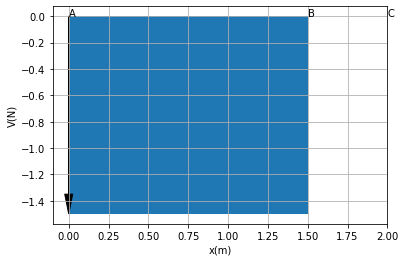

In [10]:
plot_reaction_force_upward(x=x_A_m, length=R_A_N)

plt.fill_between(x_AB_m_array, V_AB_N_array)

plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')

plt.xlim(xmax=x_C_m)
plt.xlabel('x(m)')
plt.ylabel('V(N)')
plt.grid(True)

plt.show()



#### 굽힘모멘트선도<br>Bending Moment Diagram



In [11]:
M_AB_Nm_array = R_A_N * x_AB_m_array



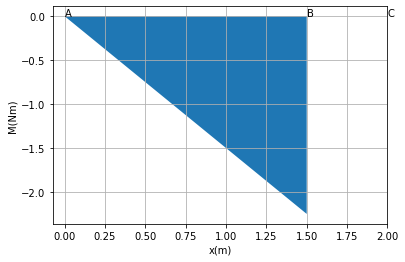

In [12]:
plt.fill_between(x_AB_m_array, M_AB_Nm_array)
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')
plt.xlim(xmax=x_C_m)
plt.xlabel('x(m)')
plt.ylabel('M(Nm)')
plt.grid(True)
plt.show()



### B-C 구간<br>B-C span



In [13]:
x_BC_m_array = np.linspace(x_B_m, x_C_m, 25+1)



#### 전단력선도<br>Shear Force Diagram



계속해서 A 지점에서의 반력만 감안한다.



In [14]:
V_BC_N_array = R_A_N * np.ones_like(x_BC_m_array)



A 지점에서의 반력을 화살표로 표시한다.



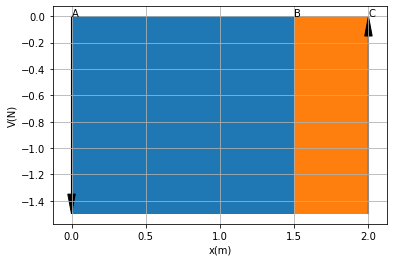

In [15]:
ax = plt.axes()
ax.arrow(x_A_m, 0, 
         0, R_A_N * 0.9, 
         head_width=0.05, head_length=0.1 * abs(R_A_N), fc='k', ec='k')

# C 지점에서의 반력을 화살표로 표시한다.
ax.arrow(x_C_m, -R_C_N, 
         0, R_C_N * 0.9, 
         head_width=0.05, head_length=0.1 * abs(R_C_N), fc='k', ec='k')

plt.fill_between(x_AB_m_array, V_AB_N_array)
plt.fill_between(x_BC_m_array, V_BC_N_array)

plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')
plt.xlabel('x(m)')
plt.ylabel('V(N)')
plt.grid(True)
plt.show()



#### 굽힘모멘트선도<br>Bending Moment Diagram



B 지점의 모멘트의 영향을 반영한다.



In [16]:
M_BC_Nm_array = R_A_N * x_BC_m_array + M_B_Nm



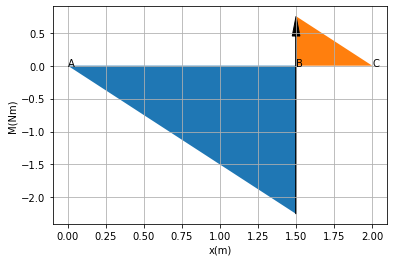

In [17]:
ax = plt.axes()
ax.arrow(x_B_m, R_A_N * x_B_m, 
         0, M_B_Nm * 0.9, 
         head_width=0.05, head_length=0.1 * abs(M_B_Nm), fc='k', ec='k')

plt.fill_between(x_AB_m_array, M_AB_Nm_array)
plt.fill_between(x_BC_m_array, M_BC_Nm_array)
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')
plt.xlabel('x(m)')
plt.ylabel('M(Nm)')
plt.grid(True)
plt.show()



아래위로 나란히 그려 본다



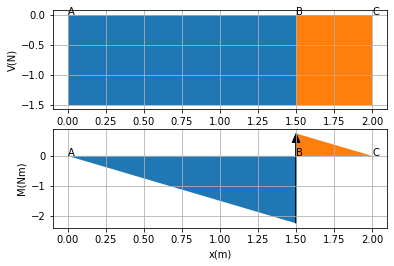

In [18]:
plt.subplot(2, 1, 1)
plt.fill_between(x_AB_m_array, V_AB_N_array)
plt.fill_between(x_BC_m_array, V_BC_N_array)
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')
plt.xlabel('x(m)')
plt.ylabel('V(N)')
plt.grid(True)

ax = plt.subplot(2, 1, 2)
plt.fill_between(x_AB_m_array, M_AB_Nm_array)
plt.fill_between(x_BC_m_array, M_BC_Nm_array)
ax.arrow(x_B_m, R_A_N * x_B_m, 
         0, M_B_Nm * 0.9, 
         head_width=0.05, head_length=0.1 * abs(M_B_Nm), fc='k', ec='k')
plt.text(x_A_m, 0, 'A')
plt.text(x_B_m, 0, 'B')
plt.text(x_C_m, 0, 'C')
plt.xlabel('x(m)')
plt.ylabel('M(Nm)')
plt.grid(True)

plt.show()

